**Proyek yang Disesuaikan: Analisis Waktu Mendengarkan harian Pengguna Spotify 🎵**

**Latar Belakang: Sebuah platform streaming musik ingin memahami apakah fitur baru mereka (seperti podcast dan playlist yang dipersonalisasi) telah berhasil meningkatkan waktu dengar harian pengguna. Laporan industri dari beberapa tahun lalu menunjukkan bahwa rata-rata pengguna mendengarkan musik selama 30 menit per hari.**

**Tujuan: Tentukan apakah rata-rata waktu dengar harian pengguna saat ini secara statistik lebih tinggi dari angka historis 30 menit.**

---

**Langkah-langkah Proyek:**

**1. Tetapkan Hipotesis:**
- Hipotesis Nol (H0): Rata-rata waktu dengar harian pengguna (listening_time) adalah 30 menit atau kurang. (μ ≤ 30)
- Hipotesis Alternatif (HA): Rata-rata waktu dengar harian pengguna (listening_time) lebih dari 30 menit. (μ > 30)

---
**2. Persiapan Data:**
- Muat dataset Anda yang berisi data pengguna, termasuk kolom listening_time.
- Ambil sampel acak dari data Anda (misalnya, 500 pengguna) untuk dianalisis.

In [16]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")

print("Path to dataset files:", path)

print(os.listdir(path))

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\nabihazahid\spotify-dataset-for-churn-analysis\versions\2
['spotify_churn_dataset.csv']


In [17]:
file_path = os.path.join(path, 'spotify_churn_dataset.csv')

import pandas as pd

spotify_df = pd.read_csv(file_path)
spotify_df.head()


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [18]:
spotify_df['listening_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8000 entries, 0 to 7999
Series name: listening_time
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 62.6 KB


In [25]:
# buat kolom daily_listening_time
sample_df = spotify_df['daily_listening_time'] = spotify_df['listening_time'] / 7
# ambil sample acaks sebanyak 500 sample
sample_df = spotify_df.sample(n=500, random_state=42)
# Di dalam cell persiapan data Anda

sample_df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,daily_listening_time
2215,2216,Female,21,CA,Premium,184,22,0.40,Mobile,0,1,0,26.285714
2582,2583,Other,23,US,Premium,234,10,0.38,Desktop,0,1,0,33.428571
1662,1663,Other,55,US,Student,33,93,0.09,Mobile,0,1,0,4.714286
3027,3028,Other,39,PK,Family,207,98,0.60,Mobile,0,1,1,29.571429
4343,4344,Female,16,UK,Premium,117,56,0.00,Web,0,1,1,16.714286


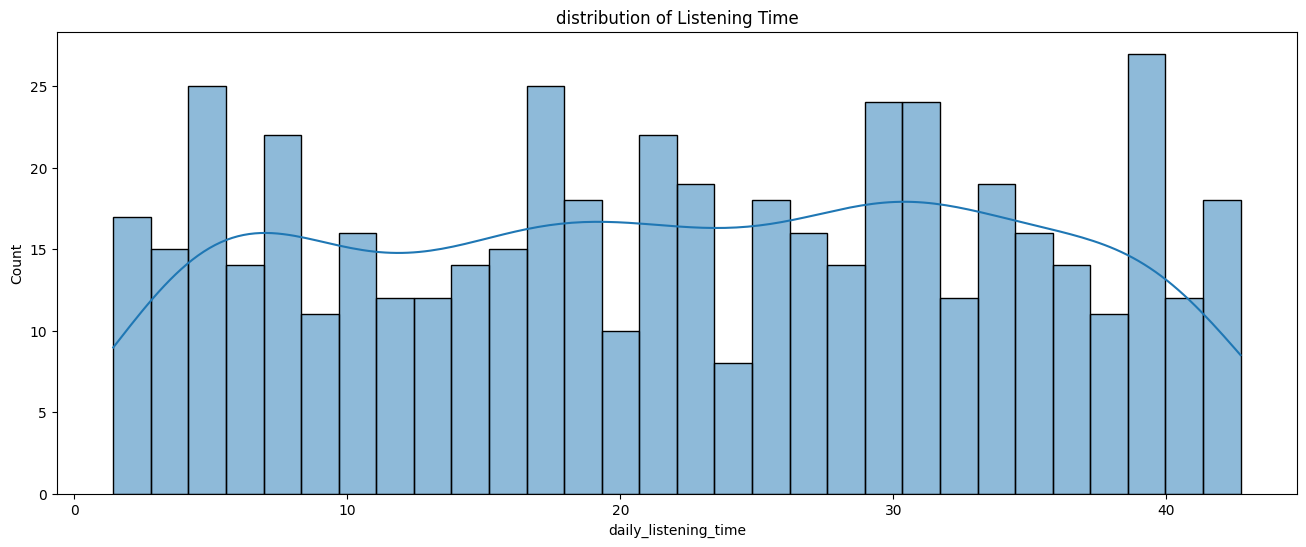

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
sns.histplot(sample_df['daily_listening_time'], bins=30, kde=True)
plt.title('distribution of Listening Time')
plt.show()

---

**4. Lakukan Uji Hipotesis:**

- Hitung Statistik Sampel: Hitung rata-rata listening_time dari sampel Anda. Sebut ini mean_listening_samp.
- Buat Distribusi Bootstrap: Lakukan resampling pada sampel listening_time Anda (dengan penggantian) sebanyak 5.000 kali. Di setiap iterasi, hitung rata-ratanya dan simpan hasilnya.
- Hitung Standard Error: Hitung standar deviasi dari distribusi bootstrap yang Anda buat
- Hitung Z-score: Gunakan rumus z-score dengan statistik sampel Anda, nilai hipotesis (30), dan standard error yang telah dihitung.
    - z_score = (mean_listening_samp - 30) / std_error
- Hitung P-value: Karena HA adalah 'lebih dari', ini adalah tes sisi kanan (right-tailed test). Untuk menghitung p-value, gunakan:
    - p_value = 1 - norm.cdf(z_score) 

In [29]:
mean_listening_time = sample_df['daily_listening_time'].mean()
print('Rata-rata waktu mendengarkan music pada sample dalam menit:', mean_listening_time)

# bootstrap distribution
import numpy as np 

 # Step 3. Repeat steps 1 & 2 many times, appending to a list 
spotify_boot_distn = [] 

for i in range(5000):   
    spotify_boot_distn.append(     
 # # Step 2. Calculate point estimate    
        np.mean(           
 # Step 1. Resample         
        sample_df.sample(frac=1, replace=True)['daily_listening_time']) 
    ) 

std_error = np.std(spotify_boot_distn, ddof=1)
print('Standard error:', std_error)

# z-score
z_score = (mean_listening_time - 30) / std_error
print('z-score:', z_score)

# p-value Ha : mean > 30
from scipy.stats import norm 

p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
print('p-value:', p_value)

Rata-rata waktu mendengarkan music pada sample dalam menit: 22.186571428571426
Standard error: 0.544676423698175
z-score: -14.34508311995211
p-value: 1.0


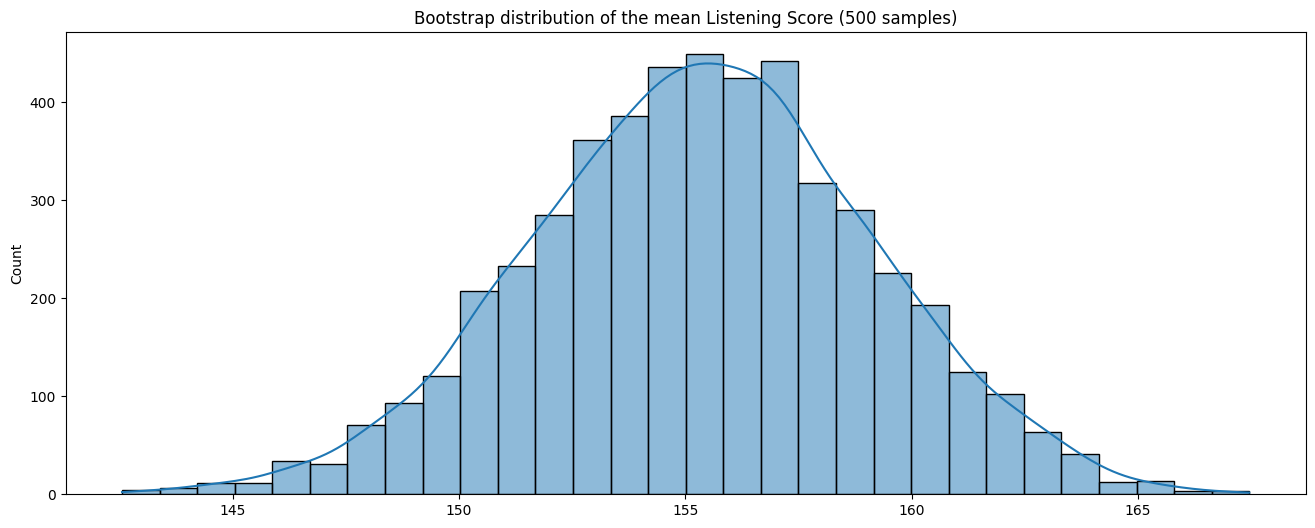

In [22]:
plt.figure(figsize=(16,6))
sns.histplot(spotify_boot_distn, bins=30, kde=True)
plt.title('Bootstrap distribution of the mean Listening Score (500 samples)')
plt.show()

---
**4. Tarik Kesimpulan:**

- mencari H1 alternatif untuk membuktikan rata-rata waktu harian mendengarkan lebih besar dari 30 menit
- tingkat signifikansi, misalnya α=0.05.
- hasil p-value > α atau 0.0 < 0.5
- Jika p-value ≤ α, Anda dapat menolak hipotesis nol. 

**Berdasarkan hasil uji hipotesis terhadap rata-rata waktu mendengarkan musik, Dengan tingkat signifikansi 5%, hasil uji menunjukkan nilai rata-rata sampel (22,19 menit) lebih kecil dari klaim populasi (30 menit) dengan nilai Z = -14,35 dan p-value = 1,0 untuk uji satu sisi (right-tailed). Oleh karena itu, keputusan uji adalah gagal menolak H0. Dengan demikian, tidak terbukti bahwa rata-rata waktu mendengarkan musik lebih besar dari 30 menit.**



----